In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/Users/shubham/Documents/Rutgers University/MS in Data Science/Projects/Machine Learning Basics/Classification/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = df.drop('variety', axis = 1)
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [5]:
df_actual_predicted = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_actual_predicted.head()

,y_test,y_pred
73,Versicolor,Versicolor
18,Setosa,Setosa
118,Virginica,Virginica
78,Versicolor,Versicolor
76,Versicolor,Versicolor


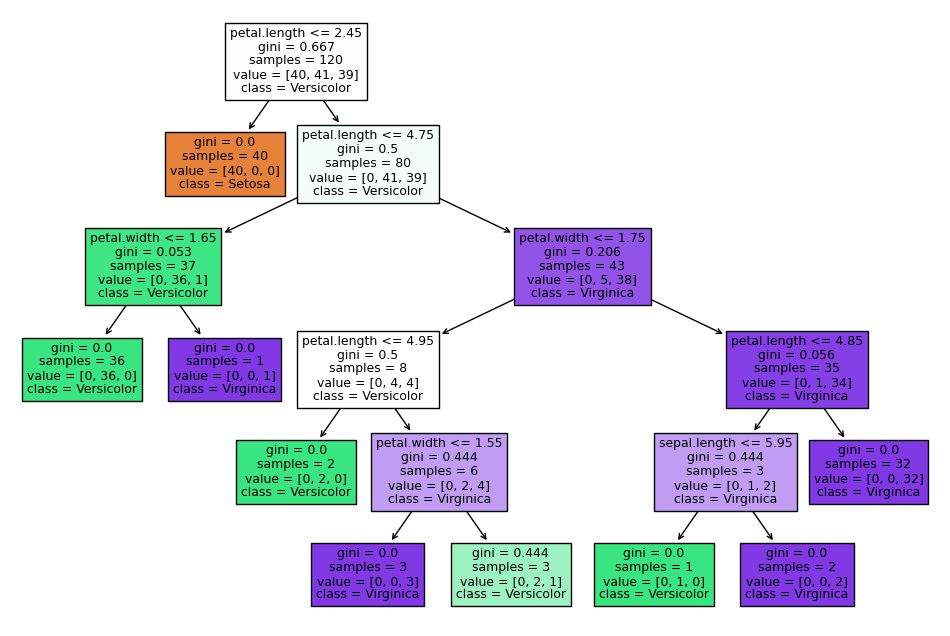

In [6]:
target_names = df['variety'].unique()
plt.figure(figsize = (12, 8))
plot_tree(dtree, feature_names = X.columns, class_names = target_names, filled = True)
plt.show()

In [7]:
dtree1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
dtree1.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)

In [8]:
df_actual_predicted1 = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred1})
df_actual_predicted1.head()

,y_test,y_pred
73,Versicolor,Versicolor
18,Setosa,Setosa
118,Virginica,Virginica
78,Versicolor,Versicolor
76,Versicolor,Versicolor


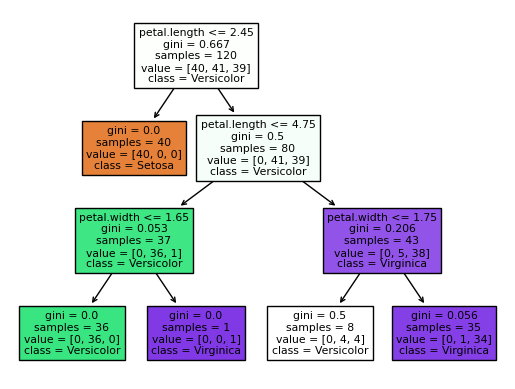

In [9]:
plot_tree(dtree1, feature_names = X.columns, class_names = target_names, filled = True)
plt.show()

In [10]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy Score: 1.0
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# prediction using user input
user_input = {
    'sepal.length': 5.8,
    'sepal.width': 2.7,
    'petal.length': 5.1,
    'petal.width': 1.9
}

df_input = pd.DataFrame([user_input])

predicted_species = dtree.predict(df_input)[0]

print(predicted_species)

Virginica
